### IMPORT LIBRARIES ###

In [1]:
#FOR CALCULATIONS
from scipy.interpolate import interp1d,make_interp_spline, BSpline
from scipy.interpolate import interp1d
#FOR FORMATING
from IPython.display import clear_output
import numpy as np
#FOR PREDICTIONS
from keras.models import Sequential
from keras.layers import Dropout,Dense,LSTM
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#FOR VISUALIZING
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
import pandas as pd
import seaborn as sns

### CONVERT CSV TO PANDAS DATAFRAME ###

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
#Raw dataset 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### DATA ANALYSIS  PART ###
***

#### Quick Notes ####
- Valid years
- Genres
- Publishers

In [4]:
int(df["Year"].min()),int(df["Year"].max())

(1980, 2020)

The data is valid between years 1980-2020

In [5]:
(df["Genre"].drop_duplicates().reset_index(drop = True))

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

The data contains 12 game genres

In [6]:
df["Publisher"].drop_duplicates().reset_index(drop=True)

0                         Nintendo
1           Microsoft Game Studios
2             Take-Two Interactive
3      Sony Computer Entertainment
4                       Activision
                  ...             
574                   Inti Creates
575                         Takuyo
576             Interchannel-Holon
577                     Rain Games
578              UIG Entertainment
Name: Publisher, Length: 579, dtype: object

There are 579 different publishers in the dataset

### Total Regional Sales and Distribution ###
Now take general look on the distribution of game sales by regions

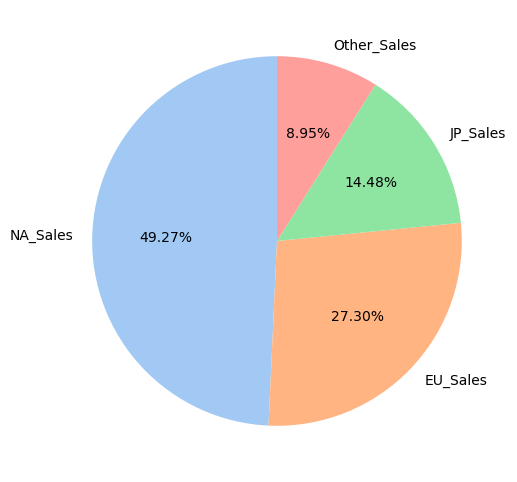

In [7]:
continental_sales = df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
plt.pie(continental_sales.sum(), colors = sns.color_palette('pastel')[0:4], 
        labels = continental_sales.columns,startangle=90,autopct='%1.2f%%')

#For displaying only the graphs, not code outputs
clear_output(wait=True)

### Regional Sales of Each Publishers ###
This is how many publisher exists in our data.

In [8]:
publishers_and_sales = pd.DataFrame(data = {"Publishers":df["Publisher"].drop_duplicates().reset_index(drop=True),
                                          "EU_Sales":np.zeros(579),"NA_Sales":np.zeros(579),"JP_Sales":np.zeros(579),
                                          "Other_Sales":np.zeros(579),
                                          "Total_Sales":np.zeros(579)})
def sumSales(arr):
    return np.sum(arr)

for index, rows in publishers_and_sales.iterrows():

    if rows["Publishers"] in df["Publisher"].values:
        publishers_and_sales.iloc[index,[1,2,3,4,5]] = df[df.Publisher == rows.Publishers][["EU_Sales","NA_Sales","JP_Sales","Other_Sales","Global_Sales"]].apply(sumSales,result_type = "expand")  

#### Most Sold 20 Companies ####

In [9]:
Top_Publishers = publishers_and_sales.sort_values(["Total_Sales"],ascending = False).head(20).reset_index(drop=True)
Top_Publishers

,Publishers,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Total_Sales
0,Nintendo,418.74,816.87,455.42,95.33,1786.56
1,Electronic Arts,371.27,595.07,14.04,129.77,1110.32
2,Activision,215.53,429.70,6.54,75.34,727.46
3,Sony Computer Entertainment,187.72,265.22,74.10,80.45,607.50
4,Ubisoft,163.32,253.43,7.50,50.26,474.72
5,Take-Two Interactive,118.14,220.49,5.83,55.24,399.54
6,THQ,94.73,208.77,5.01,32.14,340.77
7,Konami Digital Entertainment,69.69,92.16,91.30,30.31,283.64
8,Sega,82.00,109.40,57.03,24.52,272.99
9,Namco Bandai Games,42.63,69.52,127.07,14.69,254.09


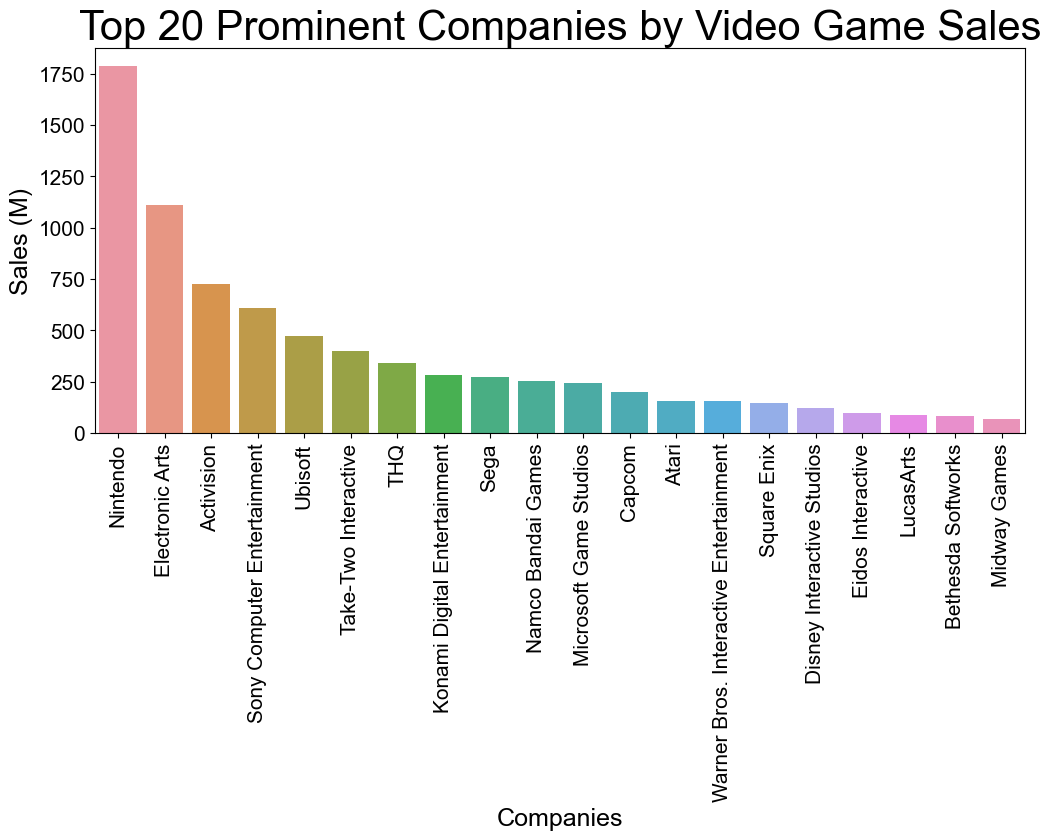

In [10]:
plt.figure(figsize = (12,5))

sns.barplot(x = Top_Publishers["Publishers"], 
        y = Top_Publishers["Total_Sales"])

plt.title("Top 20 Prominent Companies by Video Game Sales",fontsize = 30)

plt.xlabel("Companies",fontsize = 18)
plt.ylabel("Sales (M)",fontsize = 18)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.xticks(rotation = 90)

plt.style.use("seaborn-dark")

As shown in the figure, Nintendo has made roughly $1.75 billion profits from game sales over the last 40 years.

#### Progress of Nintendo year by year ####

In [11]:
print(f"Earliest game: \n{df[df.Publisher == 'Nintendo'].sort_values('Year', ascending = True).min()[['Year','Name']]} \n")
print(f"Latest game: \n{df[df.Publisher == 'Nintendo'].sort_values('Year', ascending = True).max()[['Year','Name']]}")

Earliest game: 
Year               1983.0
Name    100 Classic Books
dtype: object 

Latest game: 
Year                      2016.0
Name    Zero: Tsukihami no Kamen
dtype: object


- The history of the Nintendo company as far as we know dates back to 1983. Also, 100 Classic Books is the first product which has been published.

- Zero: Tsukihami no Kamen is the latest game published in 2016.

In [12]:
Nintendo_Sales = df[df.Publisher == "Nintendo"].sort_values("Year", ascending = True)
Nintendo_Sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1839,1841,Donkey Kong Jr.,NES,1983.0,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
763,765,Mahjong,NES,1983.0,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
421,422,Baseball,NES,1983.0,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
700,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
1861,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
...,...,...,...,...,...,...,...,...,...,...,...
5508,5510,Custom Robo,N64,NaN,Role-Playing,Nintendo,0.00,0.00,0.29,0.04,0.33
11409,11411,Zero: Tsukihami no Kamen,Wii,NaN,Action,Nintendo,0.00,0.00,0.08,0.00,0.08
14997,15000,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
14999,15002,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


##### Progress of Nintendo in Different Regions #####

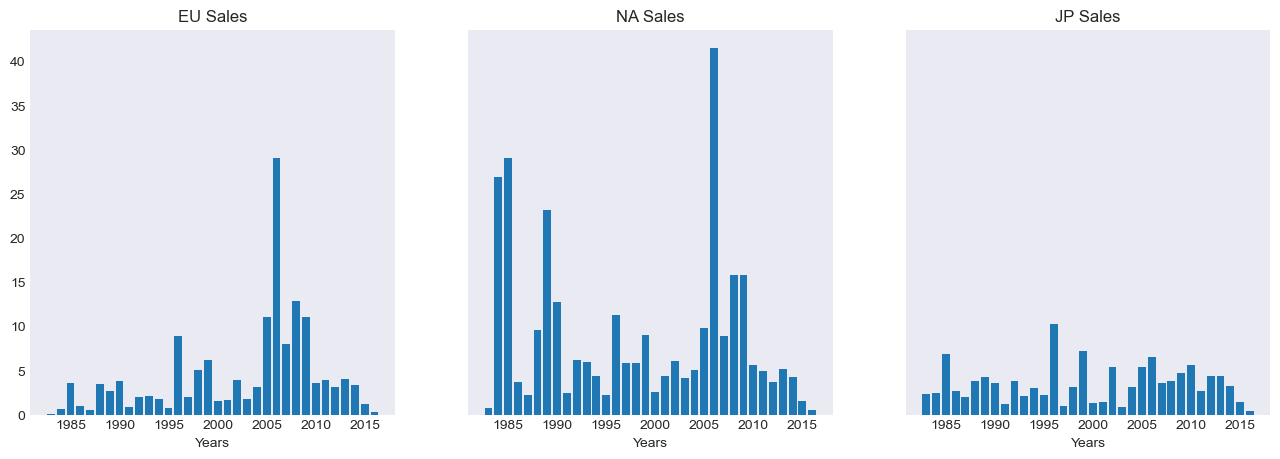

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3 ,figsize = (16,5), sharey= True)

ax1.set_xlabel("Years")
ax1.set_title("EU Sales")

ax2.set_xlabel("Years")
ax2.set_title("NA Sales")

ax3.set_xlabel("Years")   
ax3.set_title("JP Sales")

ax1.bar(Nintendo_Sales["Year"],Nintendo_Sales["EU_Sales"])
ax2.bar(Nintendo_Sales["Year"],Nintendo_Sales["NA_Sales"])
ax3.bar(Nintendo_Sales["Year"],Nintendo_Sales["JP_Sales"])

plt.style.use("seaborn")


**It can be said that the games developed by Nintendo until 1995 are more important in the Japanese market and the US market.**

**Conclusions:**

- Since Nintendo is a Japanese and US multinational company, it may not be possible to open up to the European market at first.

- It can be seen that game sales of Nintendo boomed in 2006. Lets check the reason for it.

In [14]:
df[(df.Publisher == "Nintendo") & (df.Year == 2006)].sort_values(by = "Global_Sales",ascending = False).head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31


Some of Nintendo's most popular games in 2006, such as Super Mario Bros, Legend of Zelda and Wii Sports, reason of this increase.

Also, "Wii Sports" which is the best-selling game of Nintendo published in 2006.

**Global Sales compared to top 20 publishers**

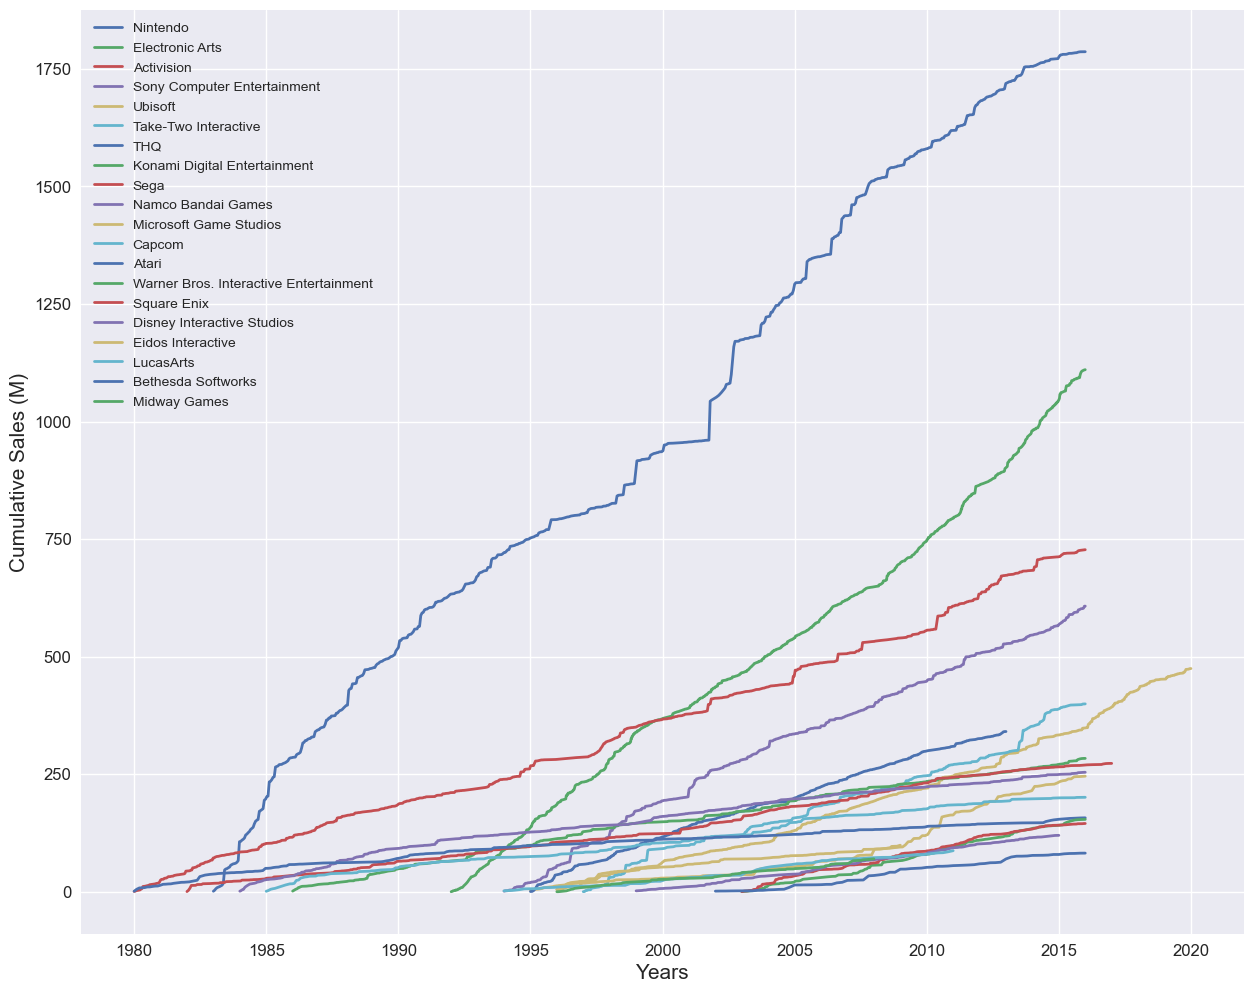

In [15]:
plt.figure(figsize = (15,12))
Publisher_CumulativeSales = pd.DataFrame()
Publisher_CumulativeSales["Publisher"] = Top_Publishers["Publishers"]

for index, rows in Top_Publishers.iterrows():
    
    newRow = df[df.Publisher == rows["Publishers"]].sort_values("Year", ascending = True)
    
    cumulativeSales = newRow["Global_Sales"].cumsum(skipna=True)
    
    xnew = np.linspace(newRow["Year"].min(),newRow["Year"].max(), len(cumulativeSales.index))  
    
    spl = make_interp_spline(xnew,cumulativeSales,k=9)  # type: BSpline
    
    power_smooth = spl(xnew)

    plt.plot(xnew,power_smooth, label = rows["Publishers"],linewidth=2)
   

plt.legend()   
    
plt.xlabel("Years",fontsize = 15)
plt.ylabel("Cumulative Sales (M)",fontsize = 15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

    
    

Progress of Global Sales of Top 20 Publisher year by year.

Assumptions: 
- By looking at the increase rate, it is likely that Sony Computer Entertainment may have passed Activision between 2015-2020
- The two companies with the fastest growth over the years are Nintendo and Electronics arts
- The company that showed the least increase (almost zero) is Atari company. The decrease in popularity of Atari games with new technological developments may be a reason for this. Lets check if Atari has new games after 95's.


In [16]:
(df[(df.Publisher == "Atari") & (df.Platform == "2600")].sort_values(by = "Year")["Global_Sales"].mean(),
df[(df.Publisher == "Atari") & (df.Platform != "2600")].sort_values(by = "Year")["Global_Sales"].mean())

(0.9275925925925926, 0.34669902912621336)

There is a noticeable difference between the averages of revenues from the 2600  **( \$ 0.927M)** platform, where Atari first came out, and the revenues from other platforms **(0.346M)** . It can be said that it is really related to technological developments.

### GENRES ###

It is time to analyse top sold genres and popular regional markets.

In [17]:
genres_and_sales = pd.DataFrame(columns = ['Genre', 'EU_Sales','NA_Sales','JP_Sales','Other_Sales','Global_Sales'])
genres_and_sales['Genre'] = df.Genre.drop_duplicates().reset_index(drop = True)

def sumSales(arr):
    return np.sum(arr)

for index, rows in genres_and_sales.iterrows():
    genres_and_sales.iloc[index]["EU_Sales","NA_Sales","JP_Sales","Other_Sales","Global_Sales"] = df[df.Genre == rows.Genre][["EU_Sales","NA_Sales","JP_Sales","Other_Sales","Global_Sales"]].apply(sumSales, result_type='expand') 



In [18]:
genres_and_sales

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,Sports,376.85,683.35,135.37,134.97,1330.93
1,Platform,201.63,447.05,130.77,51.59,831.37
2,Racing,238.39,359.42,56.69,77.27,732.04
3,Role-Playing,188.06,327.28,352.31,59.61,927.37
4,Puzzle,50.78,123.78,57.31,12.55,244.95
5,Misc,215.98,410.24,107.76,75.32,809.96
6,Shooter,313.27,582.6,38.28,102.69,1037.37
7,Simulation,113.38,183.31,63.7,31.52,392.2
8,Action,525.0,877.83,159.95,187.38,1751.18
9,Fighting,101.32,223.59,87.35,36.68,448.91


There are 12 different genres in the data.

In [19]:
Top_Genres_Global = genres_and_sales.sort_values(by = "Global_Sales",ascending = False).reset_index(drop = True)
Top_Genres_Global

,Genre,EU_Sales,NA_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,525.0,877.83,159.95,187.38,1751.18
1,Sports,376.85,683.35,135.37,134.97,1330.93
2,Shooter,313.27,582.6,38.28,102.69,1037.37
3,Role-Playing,188.06,327.28,352.31,59.61,927.37
4,Platform,201.63,447.05,130.77,51.59,831.37
5,Misc,215.98,410.24,107.76,75.32,809.96
6,Racing,238.39,359.42,56.69,77.27,732.04
7,Fighting,101.32,223.59,87.35,36.68,448.91
8,Simulation,113.38,183.31,63.7,31.52,392.2
9,Puzzle,50.78,123.78,57.31,12.55,244.95


Action games rank first both in the NA market and in the global markets.

Time to check if popularity differs in other regions:

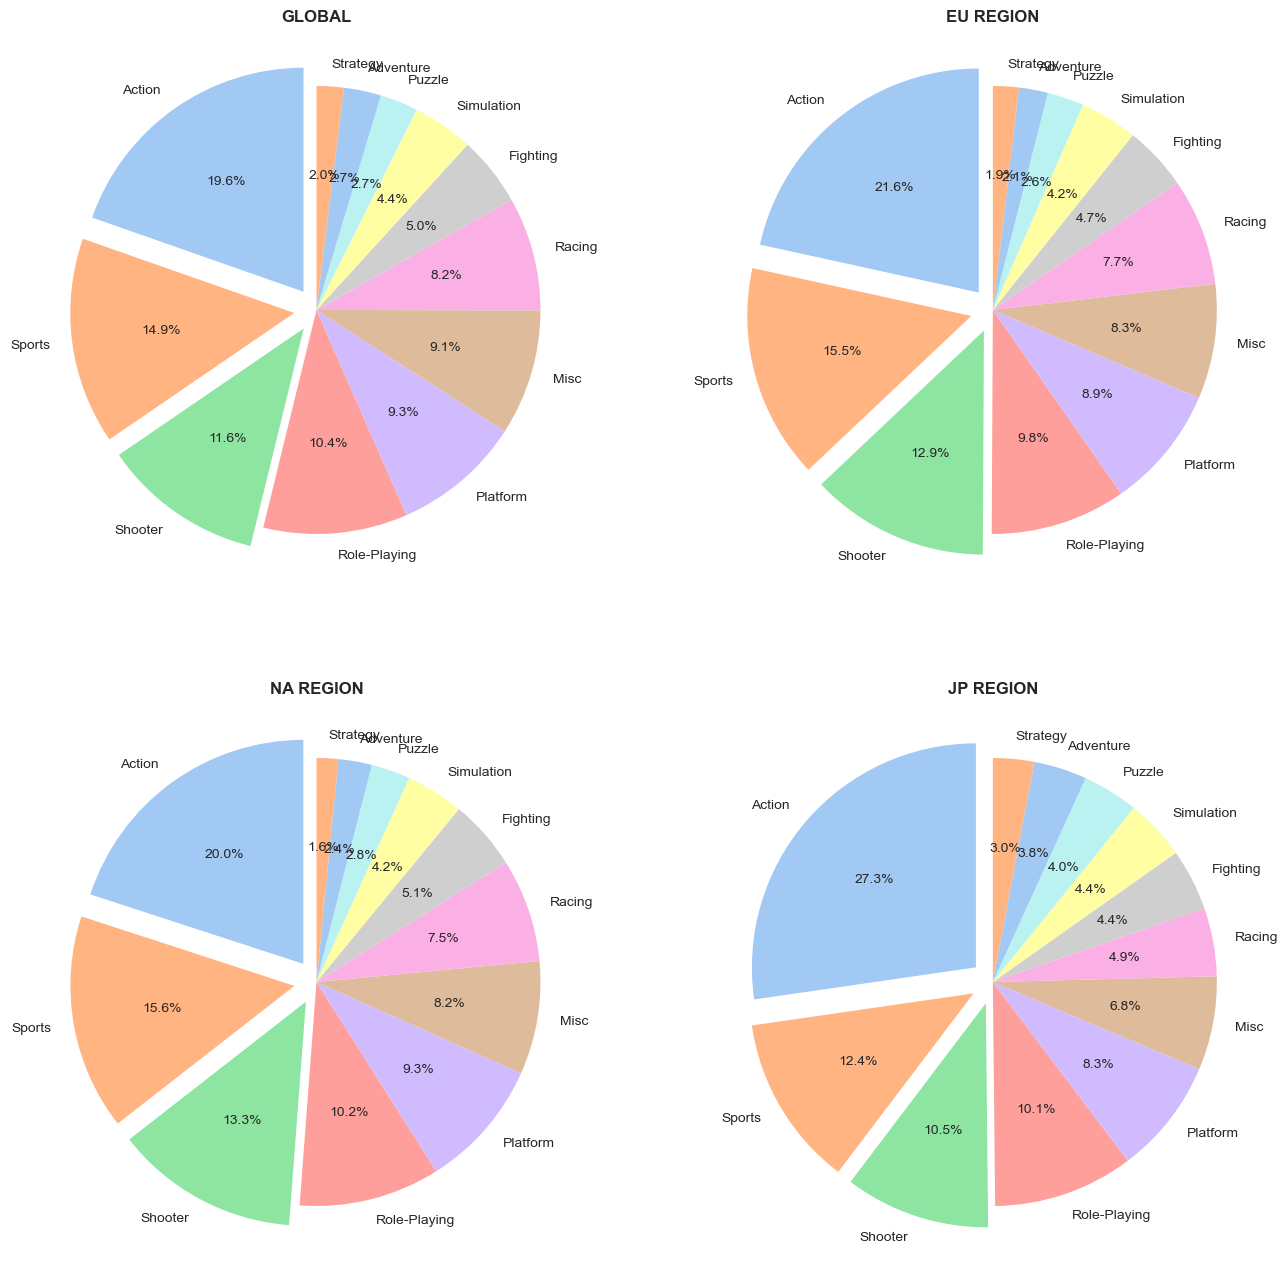

In [20]:
fig, ([ax1, ax2],[ax3,ax4]) = plt.subplots(2, 2 ,figsize = (16,16))


ax1.set_title("GLOBAL",fontweight='bold')
ax2.set_title("EU REGION",fontweight='bold')
ax3.set_title("NA REGION",fontweight='bold')
ax4.set_title("JP REGION",fontweight='bold')

explode = (0.1,0.1,0.1,0,0,0,0,0,0,0,0,0)

ax1.pie(Top_Genres_Global["Global_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)], 
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)

ax2.pie(Top_Genres_Global["EU_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)],
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)

ax3.pie(Top_Genres_Global["NA_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)],
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)

ax4.pie(Top_Genres_Global["JP_Sales"].sort_values(ascending = False),
        colors = sns.color_palette('pastel')[0:len(Top_Genres_Global)],
        labels = Top_Genres_Global.Genre,startangle=90,autopct='%1.1f%%',explode = explode)


clear_output()

Action, Sports and Shooter games are in top 3 in all regions while Strategy, Adventure and Puzzle games are in lowest 3.

So, it doesn't differ.

## Prediction Models

-----

### Making a prediction model on Nintendo's (or any other Publisher) cumulative sales.

#### Initializing variables

In [21]:
#Optionally: You may change the publisher name for checking other publishers linear regression models
publisher_name = "Nintendo" 

games_by_years = df[(df.Publisher ==publisher_name)].sort_values("Year", ascending = True).dropna(subset = ["Year"])


years = np.array(games_by_years["Year"]).reshape((-1, 1))
cumsales = games_by_years["Global_Sales"].cumsum()

#STANDARTIZATION between 0 and 1
years = (years - years.min()) /  (years.max() - years.min())
cumsales = (cumsales - cumsales.min()) /  (cumsales.max() - cumsales.min())


First to find the best prediction model:

#### Using polynomial fit model 

In [22]:
years_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(years)

polymodel = LinearRegression().fit(years_, cumsales)

In [23]:
r_sq = polymodel.score(years_, cumsales)
print(r_sq)
print(f"intercept: {polymodel.intercept_}")
print(f"slope: {polymodel.coef_}")

0.9737639530638106
intercept: 0.033408521881818753
slope: [0.13202664 0.94728705]


By using polynomial regression in the rank 2 we get 0.973 prediction score which refers to overfitting.

#### Using linear fit model

In [24]:
linmodel = LinearRegression().fit(years, cumsales)
r_sq = linmodel.score(years, cumsales)
print(f"score: {linmodel.score(years,cumsales)}")
print(f"intercept: {linmodel.intercept_}")
print(f"slope: {linmodel.coef_}")
print(f"MSE: {metrics.mean_squared_error(cumsales,linmodel.predict(years),squared = False)}")

score: 0.9231757342900088
intercept: -0.1869190014340263
slope: [1.1622402]
MSE: 0.07895028162806207


**Decision:** Prediction result of linear model was 0.923 which is less fitted than polynomial one.

- Thus, 2nd rank polynomial regression is much better for predictions.

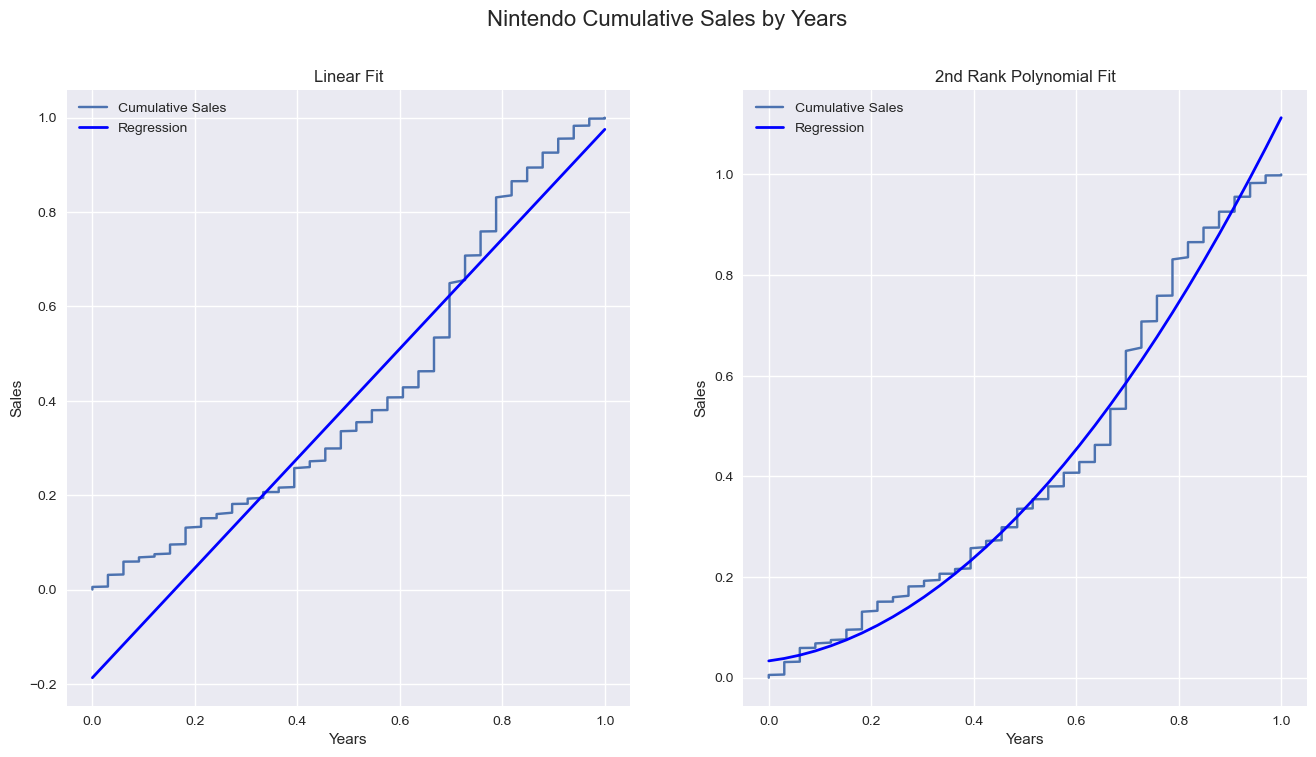

In [25]:
fig, (ax1, ax2)  = plt.subplots(1, 2 ,figsize = (16,8))

fig.suptitle(f"{publisher_name} Cumulative Sales by Years", fontsize=16)

ax1.set_title(f"Linear Fit")

ax1.set_xlabel("Years")
ax1.set_ylabel("Sales")

predict_years = linmodel.predict(years)
ax1.plot(years,cumsales,label="Cumulative Sales")
ax1.plot(years,predict_years, color="blue", linewidth=2,label="Regression")

ax1.legend()

plt.title(f"2nd Rank Polynomial Fit")

ax2.set_xlabel("Years")
ax2.set_ylabel("Sales")

predict_years_ = polymodel.predict(years_)

ax2.plot(years,cumsales,label="Cumulative Sales")
ax2.plot(years,predict_years_, color="blue", linewidth=2,label="Regression")
ax2.legend()

clear_output()

#### Finding the top trending and less trending publishers in top 20

By examining the lineer regression line coefficient, and model scores we may obtain some infos like trends and steady growth

In [26]:
publishers_and_regression = pd.DataFrame({"Publishers" : Top_Publishers["Publishers"]})
publishers_and_regression.reset_index(drop = True)
coefs =[]
scores =[]

for index,row in publishers_and_regression.iterrows():
    games_by_years = df[df.Publisher == row["Publishers"]].sort_values("Year", ascending = True).dropna(subset = ["Year"])
    
    years = np.array(games_by_years["Year"]).reshape((-1, 1))
    
    cumsales = games_by_years["Global_Sales"].cumsum()
    
    standardized_years = (years - years.min()) /  (years.max() - years.min())    
    standardized_cumsales = (cumsales - cumsales.min()) /  (cumsales.max() - cumsales.min())
    
    linmodel = LinearRegression().fit(standardized_years,standardized_cumsales)
    score = linmodel.score(standardized_years,standardized_cumsales)
    coef = round(float(linmodel.coef_),3)
    coefs.append(coef)
    scores.append(score)
    
publishers_and_regression["coefficients"] = coefs
publishers_and_regression["scores"] = scores


In [27]:
publishers_and_regression.sort_values(by="scores",ascending = False).reset_index(drop=True)

,Publishers,coefficients,scores
0,Sony Computer Entertainment,1.129,0.991662
1,Square Enix,1.085,0.985920
2,Eidos Interactive,0.847,0.983173
3,THQ,1.409,0.980273
4,Midway Games,1.048,0.972835
5,Electronic Arts,1.387,0.971920
6,Take-Two Interactive,1.189,0.968091
7,Konami Digital Entertainment,1.542,0.950730
8,Microsoft Game Studios,1.398,0.949883
9,Warner Bros. Interactive Entertainment,1.470,0.945703


As the table shows, Sony Computer Entertainment's global sales are increasing most steadily because the predicted model and the real model are quite compatible.

In [28]:
publishers_and_regression.sort_values(by="coefficients",ascending = False).reset_index(drop=True)

,Publishers,coefficients,scores
0,Ubisoft,1.729,0.927842
1,Disney Interactive Studios,1.668,0.923187
2,Sega,1.663,0.895721
3,Konami Digital Entertainment,1.542,0.950730
4,Activision,1.483,0.727420
5,Warner Bros. Interactive Entertainment,1.470,0.945703
6,THQ,1.409,0.980273
7,Microsoft Game Studios,1.398,0.949883
8,LucasArts,1.388,0.833603
9,Electronic Arts,1.387,0.971920


It can be assumed that Ubisoft is a company with a very fast growth rate. Yet, this is unclear as it has a lower model score than the others. (This inconsistency is due to the linearity of the initial and final sales data.) Therefore, model should be reinforced with other equation models (Sigmoid, Hyperbolic Tangent etc.)

### Advanced Prediction Models using Deep Learning

While linear models provide information on superficial issues such as trends and regular increase, machine learning should be used for detailed topics such as price prediction.

#### Defining Variables

In [29]:
df_new = df.dropna(subset = "Year").reset_index(drop = True)
df_new['Year'] = pd.to_datetime(df_new['Year'], format='%Y')
#Name can be changed for predicting other publisher sales.
publisher_name = "Atari"

In [30]:
publisher_df = df_new[(df_new.Publisher ==publisher_name)].sort_values("Year", ascending = True).dropna(subset = ["Year"]).reset_index(drop = True)
years = pd.DatetimeIndex(publisher_df['Year']).year
cum_sales = publisher_df["Global_Sales"].reset_index(drop = True).cumsum()
new_data = pd.DataFrame(index = range(0,len(publisher_df)) , columns = ["Year","Global_Sales"])
for i in range (0,len(new_data)):
    new_data["Year"][i]= years[i]
    new_data["Global_Sales"][i]= cum_sales[i]

#### Defining Training Datas

In [31]:
scaler=MinMaxScaler(feature_range=(0,1))
new_data.index=new_data.Year
new_data.drop("Year",axis=1,inplace=True)
final_data = new_data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

#### Implementing the Model

In [32]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=new_data[(len(new_data)-len(valid_data)-60):].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [33]:
lstm_model.compile(loss="mean_squared_error",optimizer="adam")
lstm_model.fit(np.asarray(x_train_data),np.asarray(y_train_data),epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
        
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    
predicted_sales=lstm_model.predict(X_test)
predicted_sales=scaler.inverse_transform(predicted_sales)     

140/140 - 8s - loss: 0.0155 - 8s/epoch - 54ms/step
5/5 [==============================] - 1s 16ms/step


The prediction score of Atari was nearly 78.3%  while the linear model was used which was not well-fitted and this score was 91.3% even in the polynomial model.

In the Long-Short-Term Model, the loss is close to zero (as shown above), which indicates a better model.

In [34]:
train_data=new_data[:200]
valid_data=new_data[200:]
valid_data['Predictions'] = predicted_sales

clear_output()

In [35]:
valid_data

,Global_Sales,Predictions
Year,,
2005,111.48,107.847542
2005,111.76,108.054565
2005,112.0,108.273438
2005,112.05,108.499695
2005,112.12,108.724289
...,...,...
2011,146.63,136.099396
2011,146.64,136.183838
2011,146.7,136.260696


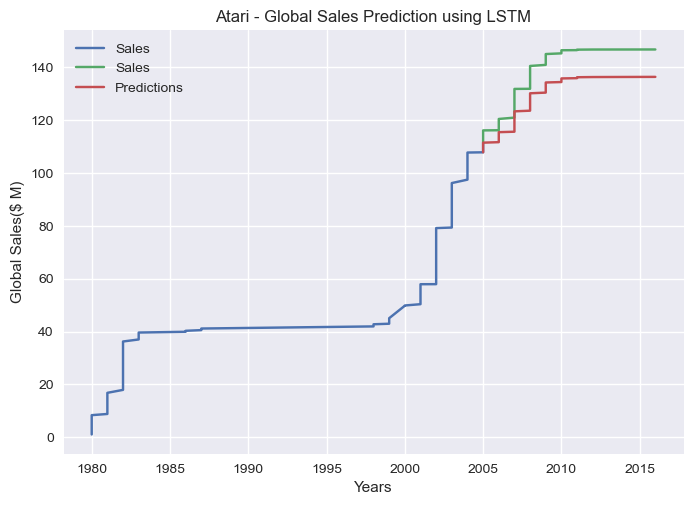

In [36]:
plt.plot(train_data["Global_Sales"],label = "Sales")
plt.plot(valid_data[['Global_Sales',"Predictions"]],label = ["Sales","Predictions"])

plt.xlabel("Years")
plt.ylabel("Global Sales($ M)")

plt.title(f"{publisher_name} - Global Sales Prediction using LSTM")
plt.legend()

clear_output()